In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

#Data Cleanup
df = pd.read_csv(r"C:\Users\Jesse\OneDrive\Desktop\SuperStoreAnalysis\SuperStoreOrders.csv")
df['order_date'] = pd.to_datetime(df['order_date'],format='mixed')
df['ship_date'] = pd.to_datetime(df['ship_date'],format='mixed')
df['sales']=df['sales'].str.replace(',','').astype('int64')
# operating on the assumption that the sales and profit column are in dollars

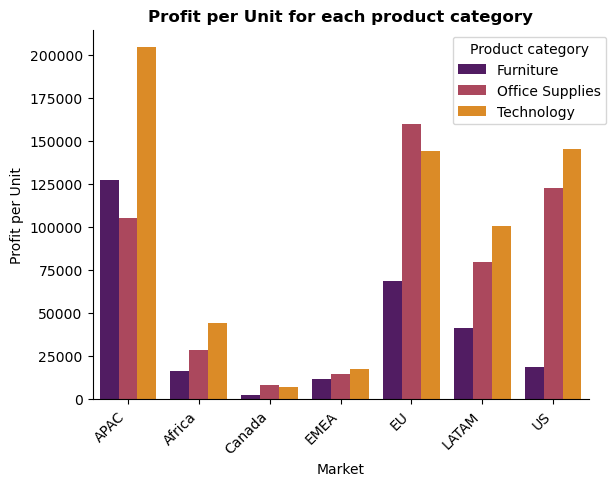

In [20]:
df_netp=df.pivot_table(values=['sales','profit','quantity'],index=['market','category'],aggfunc='sum').reset_index()
df_netp['net_profit_perc']=(df_netp['profit']/df_netp['sales'])*100
df_netp['profit_per_unit']=(df_netp['profit']/df_netp['quantity'])*100

sns.barplot(data=df_netp,x='market',y='profit',hue='category',palette='inferno')
sns.despine()
plt.title('Profit per Unit for each product category',fontweight='bold')
plt.xlabel('Market')
plt.ylabel('Profit per Unit')
plt.legend(loc='best',title='Product category',bbox_to_anchor=(1.05,1))
plt.xticks(rotation=45,ha='right')
    
plt.show()

In [3]:
pearson_df=df_netp[['net_profit_perc','profit','sales','quantity','profit_per_unit']].corr(method='pearson')
spearman_df=df_netp[['net_profit_perc','profit','sales','quantity','profit_per_unit']].corr(method='spearman')
kendall_df=df_netp[['net_profit_perc','profit','sales','quantity','profit_per_unit']].corr(method='kendall')
combined_matrx = pd.concat([
    pearson_df.add_suffix('_Pearson'),
    spearman_df.add_suffix('_Spearman'),
    kendall_df.add_suffix('_Kendall')
], axis=1)

combined_matrx

,net_profit_perc_Pearson,profit_Pearson,sales_Pearson,quantity_Pearson,profit_per_unit_Pearson,net_profit_perc_Spearman,profit_Spearman,sales_Spearman,quantity_Spearman,profit_per_unit_Spearman,net_profit_perc_Kendall,profit_Kendall,sales_Kendall,quantity_Kendall,profit_per_unit_Kendall
net_profit_perc,1.000000,0.070720,-0.265959,-0.079004,0.708316,1.000000,0.145455,-0.089610,-0.124675,0.581818,1.000000,0.190476,-0.028571,-0.057143,0.466667
profit,0.070720,1.000000,0.880519,0.581673,-0.024496,0.145455,1.000000,0.918182,0.745455,0.049351,0.190476,1.000000,0.780952,0.580952,0.095238
sales,-0.265959,0.880519,1.000000,0.533975,-0.206004,-0.089610,0.918182,1.000000,0.757143,-0.001299,-0.028571,0.780952,1.000000,0.609524,0.009524
quantity,-0.079004,0.581673,0.533975,1.000000,-0.479693,-0.124675,0.745455,0.757143,1.000000,-0.496104,-0.057143,0.580952,0.609524,1.000000,-0.323810
profit_per_unit,0.708316,-0.024496,-0.206004,-0.479693,1.000000,0.581818,0.049351,-0.001299,-0.496104,1.000000,0.466667,0.095238,0.009524,-0.323810,1.000000


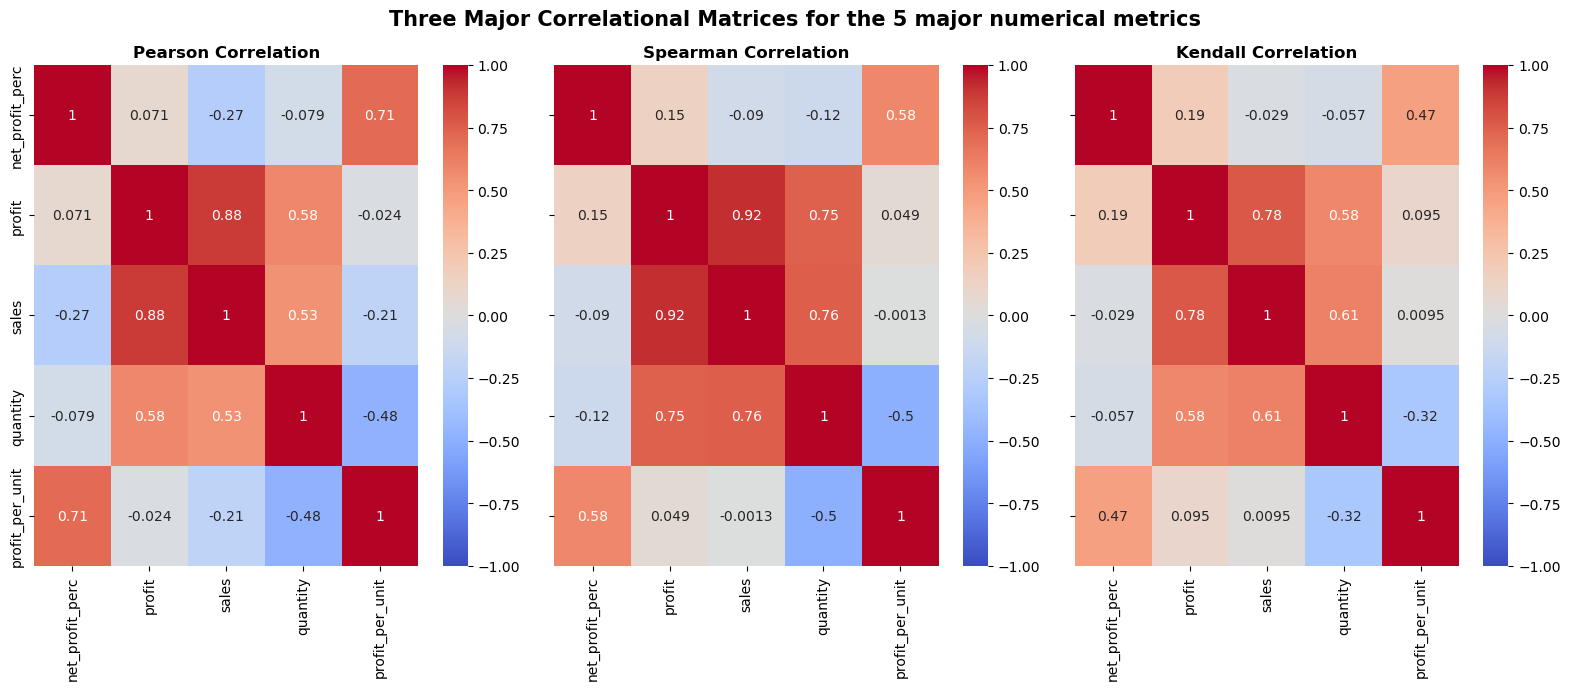

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(16, 7), sharex=True, sharey=True)

sns.heatmap(pearson_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[0])
axs[0].set_title('Pearson Correlation',fontweight='bold')

sns.heatmap(spearman_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1])
axs[1].set_title('Spearman Correlation',fontweight='bold')

sns.heatmap(kendall_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[2])
axs[2].set_title('Kendall Correlation',fontweight='bold')

plt.tight_layout()
plt.suptitle('Three Major Correlational Matrices for the 5 major numerical metrics',fontsize=15,fontweight='bold')
plt.subplots_adjust(top=0.9) 
plt.show()